# NEURON+Python example4

Cell array simulation (not complete)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import neuron

In [2]:
def calc(tstop=300):

    # setup cells
    ncell = 2
    cells = []
    for i in range(ncell):
        cell = neuron.h.Section()
        cell.nseg = 1
        cell.diam = 10
        cell.L = 10
        cell.insert("hh")
        cells.append(cell)

    # add alpha synapse stimulation    
    stim = neuron.h.AlphaSynapse(cells[0](0.5))
    stim.onset = 100
    stim.gmax = 0.2

    # setup recorder
    rec_t = neuron.h.Vector()
    rec_t.record(neuron.h._ref_t)

    rec_v_array = []
    for i in range(ncell):
        rec_v_array.append(neuron.h.Vector())
        rec_v_array[-1].record(cells[i](0.5)._ref_v)

    # initialize and run
    neuron.h.finitialize(-65)
    neuron.run(tstop)
    
    # convert recored information to ndarray
    t = np.array(rec_t.as_numpy())
    v_array = []
    for rec_v in rec_v_array:
        v_array.append(np.array(rec_v.as_numpy()))

    return t, v_array

In [3]:
def plot_voltage_array(t, v_array):
    for v in v_array:
        plt.plot(t, v)
    plt.xlabel("Time [ms]")
    plt.ylabel("Voltage [mV]")
    plt.axis(xmin=0, xmax=max(t), ymin=-80, ymax=50)
    plt.show()

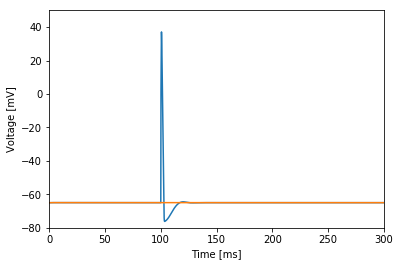

In [4]:
t, v_array = calc()
plot_voltage_array(t, v_array)